# HR Analytics Project - Understanding the Attrition in HR

### Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [779]:
# Importing all the required libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score as cvs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import joblib
import warnings
warnings.filterwarnings('ignore')

### Loading and Reading the Dataset

In [780]:
df=pd.read_csv(r'C:\Users\Desktop\Desktop\IBM_HR_Attrition_Rate_Analytics\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### Upon preliminary analysis of Dataset, we can assume that the datatypes of both Dependent and Independent Variables are mixed data set; i.e. continous type and categorical type is available

Below are the list of Feature Columns:

1. Age

2. BusinessTravel

3. DailyRate

4. Department

5. DistanceFromHome

6. Education

7. EducationField

8. EmployeeCount

9. EmployeeNumber

10. EnvironmentSatisfaction

11. Gender

12. HourlyRate

13. JobInvolvement

14. JobLevel

15. JobRole

16. JobSatisfaction

17. MaritalStatus

18. MonthlyIncome

19. MonthlyRate

20. NumCompaniesWorked

21. Over18

22. OverTime

23. PercentSalaryHike

24. PerformanceRating

25. RelationshipSatisfaction

26. StandardHours

27. StockOptionLevel

28. TotalWorkingYears

29. TrainingTimesLastYear

30. WorkLifeBalance

31. YearsAtCompany

32. YearsInCurrentRole

33. YearsSinceLastPromotion

34. YearsWithCurrManager

Target Variable is Attrition

Since the target variable 'Attrition' data type is categorical, Need to approach this data set as Classification Problem

In [781]:
df.shape

(1470, 35)

There are 1470 Rows and 35 Columns including the Target in this Dataset

### Checking for any Null Values in the dataset 

In [782]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no Null Values/ Missing Values in the dataset

In [783]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Most of the Columns Datatype is Continous, Below are the observation we can come to conclusion from above information.

Continous Data Columns (Integer Type): 

Out of 35 Columns, 26 Columns has Continous Data

1. Age

2. DailyRate

3. DistanceFromHome

4. Education

5. EmployeeCount

6. EmployeeNumber

7. EnvironmentSatisfaction

8. HourlyRate

9. JobInvolvement

10. JobLevel

11. JobSatisfaction

12. MonthlyIncome

13. MonthlyRate

14. NumCompaniesWorked

15. PercentSalaryHike

16. PerformanceRating

17. RelationshipSatisfaction

18. StandardHours

19. StockOptionLevel

20. TotalWorkingYears

21. TrainingTimesLastYear

22. WorkLifeBalance

23. YearsAtCompany

24. YearsInCurrentRole

25. YearsSinceLastPromotion

26. YearsWithCurrManager


Categorical Data Columns: 

Out of 35 Columns, 9 Columns has Categorical Data

1. Attrition

2. BusinessTravel

3. Department

4. EducationField

5. Gender

6. JobRole

7. MaritalStatus

8. Over18

9. OverTime


### Analyzing the Basic Statistics of the Dataset

In [784]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


We can observe following things from above statistics, 

1. Most of the columns will have normal distribution since mean is greater than std values.

2. mean and 50% values are almost same (Close)

3. Outliers response are possible when difference between 75% and max is high. Per review, few columns listed below will possibly have outliers

TotalWorkingYears,

YearsAtCompany,

YearsInCurrentRole,

YearsSinceLastPromotion,

YearsWithCurrManager

### Checking for any Unique Set of Values/ Elements in all Columns

In [785]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

1. Employee Count, Over18 and StandardHours has only one data for entire set; So we can conclude dropping these columns would be effective for the model building since these columns will not affect the Attrition much.


2. BusinessTravel, Department, Education, EducationField, EnvironmentSatisfaction, Gender, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, NumCompaniesWorked, OverTime, PerformanceRating, RelationshipSatisfaction, PercentSalaryHike, StockOptionLevel, TrainingTimesLastYear, WorkLifeBalance columns data has a fixed set of datas So, need to analyse these columns more with respect to relationship with Attrition.

### Analyzing Distribution of both Target and Feature Columns

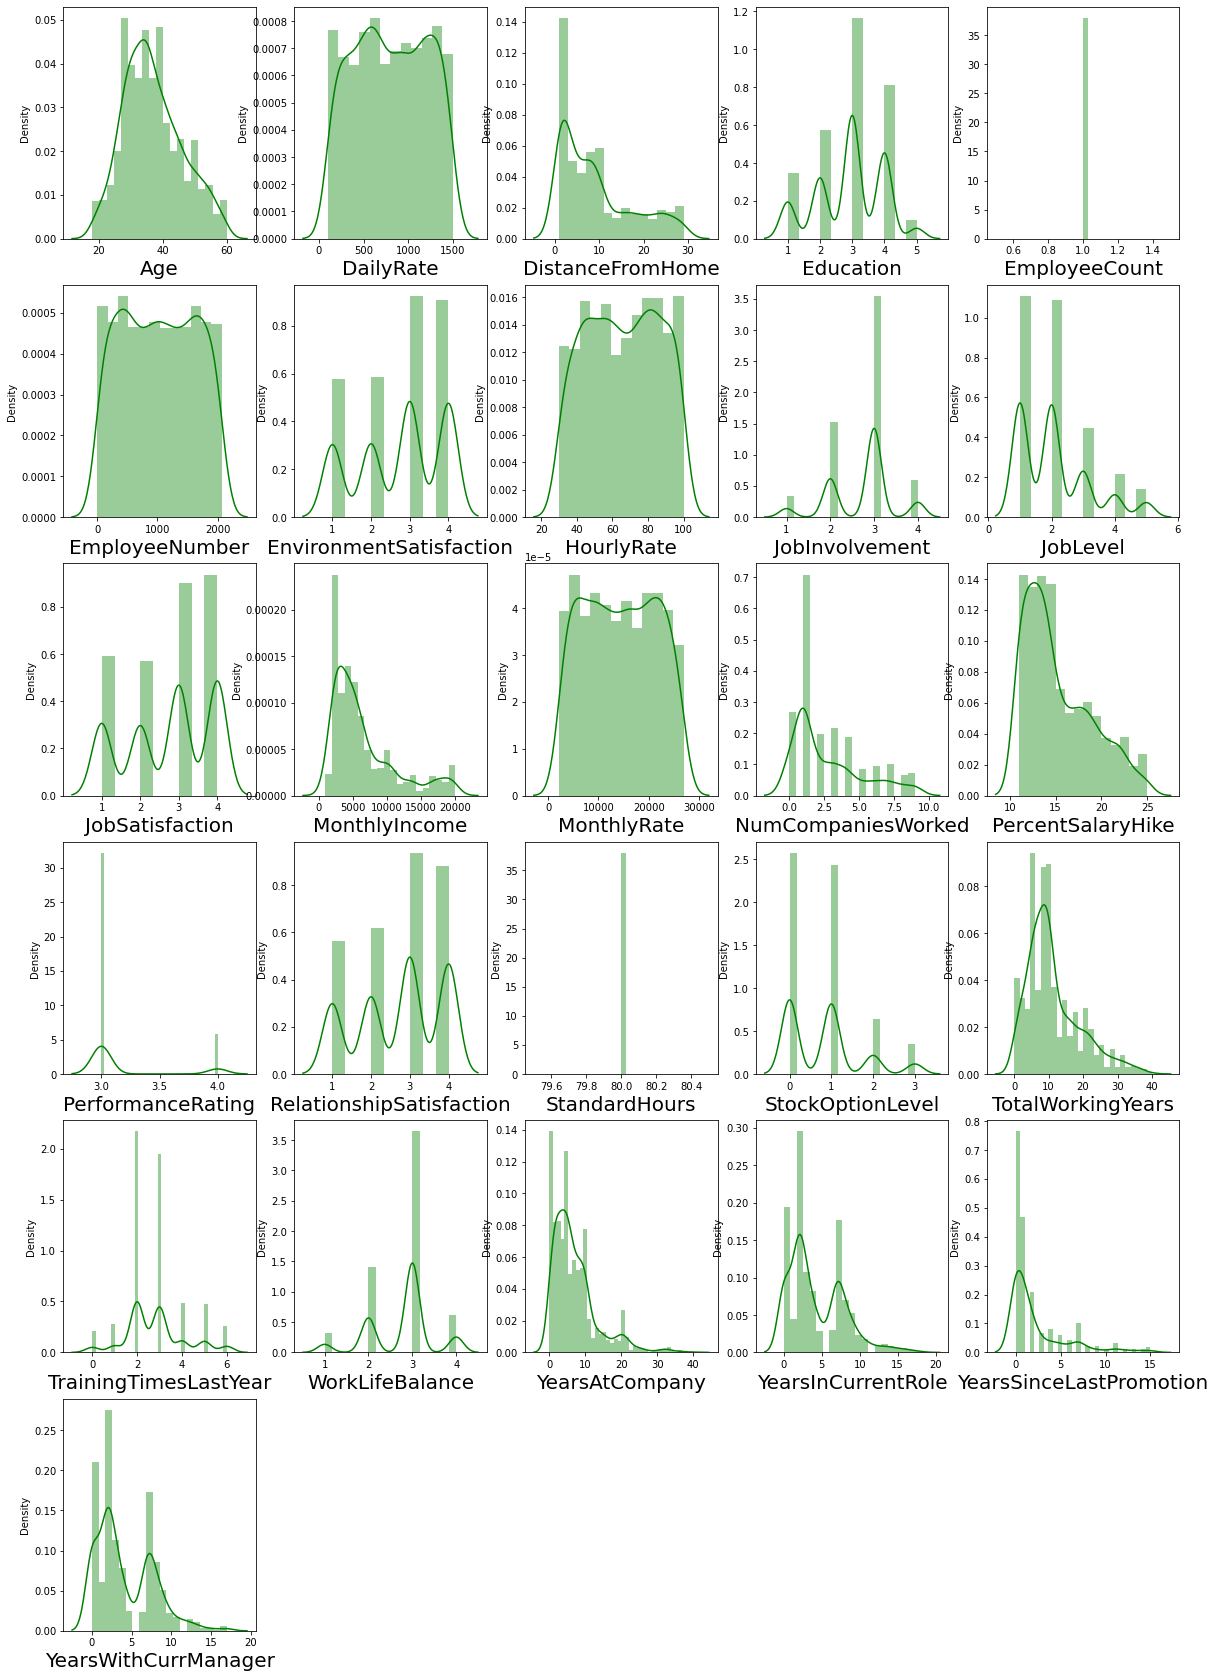

In [786]:
plt.figure(figsize = (20,35))
plot_number = 1
for i in df.drop(columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
                            'OverTime', 'Over18'], axis = 1):
    if plot_number <=35:
        plt.subplot(7,5,plot_number)
        sns.distplot(df[i], color = 'green')
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()

Upon analyzing above graphs, we can predict there might be skewness in few columns as those columns are not normally distributed


DistanceFromHome, MonthlyIncome, PercentSalaryHike, TotalWorkingYears, YearsatCompany, YearsInCurrentRole, YearsWithCurrManager column data will have skewness

Some Categorical Columns might exhibit skewness due to its categorical nature.

In [787]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

As predicted, DistanceFromHome, MonthlyIncome, PercentSalaryHike, TotalWorkingYears, YearsatCompany, YearsInCurrentRole, YearsWithCurrManager Columns data are skewed, i.e out of -0.50 to +0.50 Range 

We can also observe couple of  Categorical Column is showing skewness as well

In [788]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

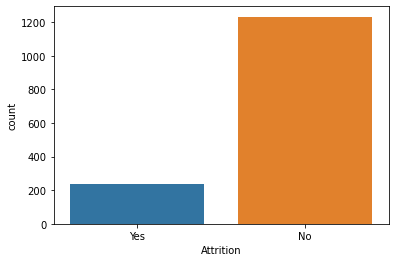

In [789]:
sns.countplot(df['Attrition'])

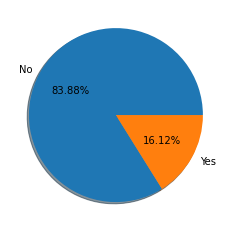

In [790]:
labels = 'No','Yes'
fig, ax = plt.subplots()
ax.pie(df['Attrition'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Upon reviewing above 3 figures, we can observe, there are 2 distinct/ unique values for Target Variable - 'Yes' and 'No'


There is also a class imbalance which needs to corrected.

No : 83.88% : 1233
Yes : 16.12% : 237 

In [791]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

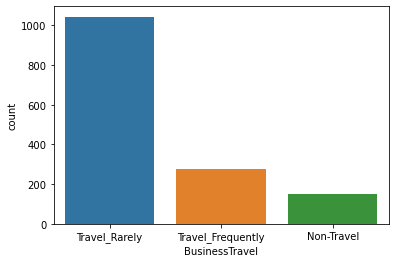

In [792]:
sns.countplot(df['BusinessTravel'])

We have 3 unique values for BusinessTravel

1. Travel_Rarely

2. Travel_Frequently

3. Non-Travel

Travel Rarely is majority, followed by Travel Frequently and Non-Travel is last.

In [793]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='count'>

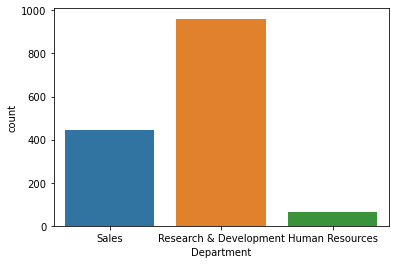

In [794]:
sns.countplot(df['Department'])

We have 3 unique values for Department

1. Research & Development

2. Sales

3. Human Resources

Research & Development is majority, followed by Sales and Human Resources is last.

In [795]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<AxesSubplot:xlabel='EducationField', ylabel='count'>

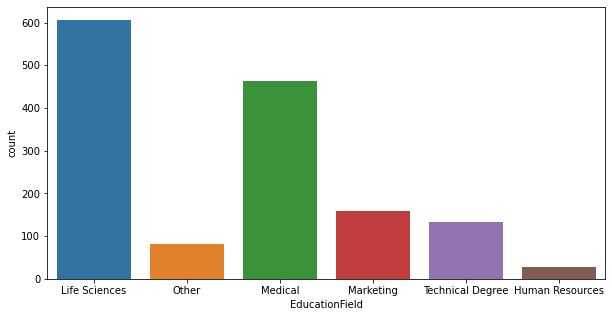

In [796]:
plt.figure(figsize=(10,5))
sns.countplot(df['EducationField'])

We have 6 unique values for Education Field

1. Life Sciences

2. Medical

3. Marketing

4. Technical Degree

5. Other

6. Human Resources

Life Sciences is majority, followed by Medical and Marketing.

In [797]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

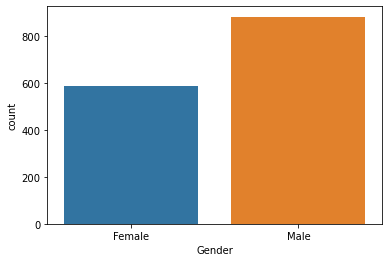

In [798]:
sns.countplot(df['Gender'])

We have 2 unique values for Gender

1. Female

2. Male

Majority of Employees are Male with a count of 882 and female employees count is 588

In [799]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<AxesSubplot:xlabel='JobRole', ylabel='count'>

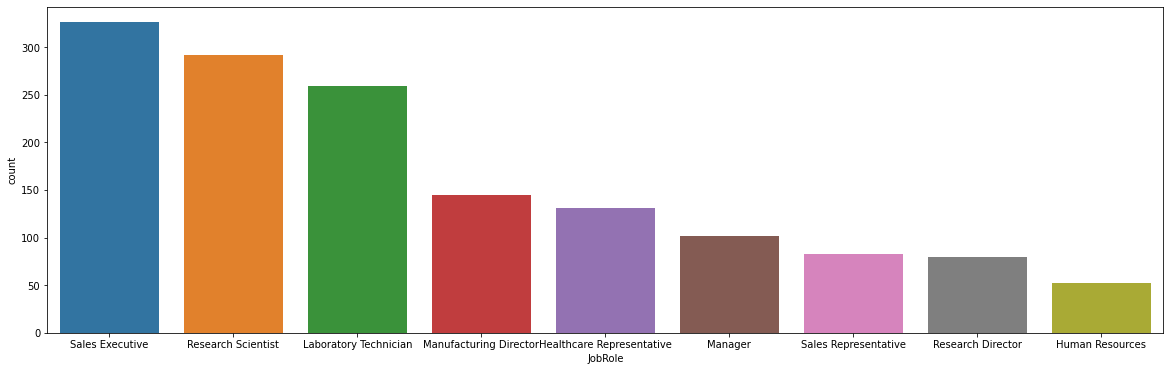

In [800]:
plt.figure(figsize=(20,6))
sns.countplot(df['JobRole'])

We have 9 unique values for JobRole


1. Sales Executive


2. Research Scientist


3. Laboratory Technician


4. Manufacturing Director


5. Healthcare Representative


6. Manager


7. Sales Representative


8. Research Director


9. Human Resources


Sales Executive Employees are majority, followed by Research Scientist and Laboratory Technician.

In [801]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

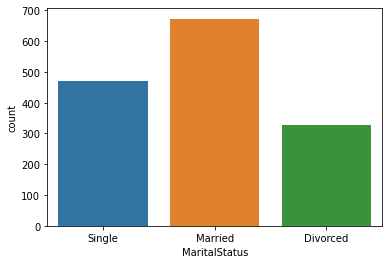

In [802]:
sns.countplot(df['MaritalStatus'])

We have 3 unique values under MaritalStatus


1. Married


2. Single


3. Divorced

Married Employees are majority, followed by Singles and also Divorced emmployees are also of reasonal number

In [803]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

<AxesSubplot:xlabel='Over18', ylabel='count'>

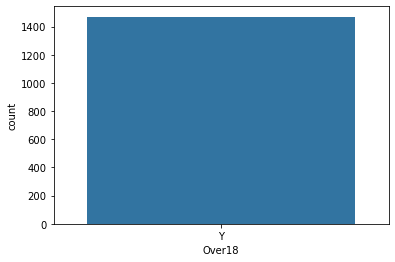

In [804]:
sns.countplot(df['Over18'])

All the Employees are over 18 years of Age. This column doesnt contribute much so this column needs to be drop

In [805]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

<AxesSubplot:xlabel='OverTime', ylabel='count'>

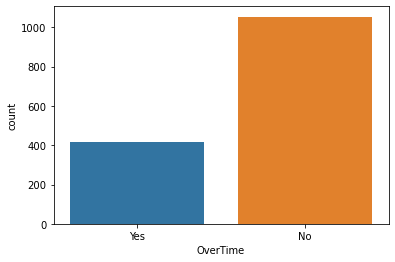

In [806]:
sns.countplot(df['OverTime'])

We have 2 unique values under OverTime


1. No


2. Yes

Majority of employees doesnt work overtime However there are reasonable employees who work over time

Like Over18, there are 2 more columns namely Since EmployeeCount and StandardHours which has one Unique value for entire set. So these 2 columns will not affect the Attrition and can be dropped from data set.

Employee Number is just a identification serial number which doesnt also contribute much so we can drop that column also

In [807]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

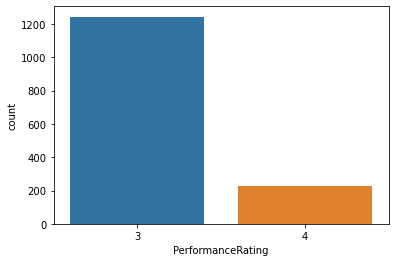

In [808]:
sns.countplot(df['PerformanceRating'])

We have 2 unique values under PerformanceRating


1. 3


2. 4

Majority of employees is receiving Rating of 3 and only few employees are receiving rating of 4. So even this column data doesnt attribute much for Attrition. We can drop this column if needed

### Analyzing the relationship between independent variable and dependent Variable

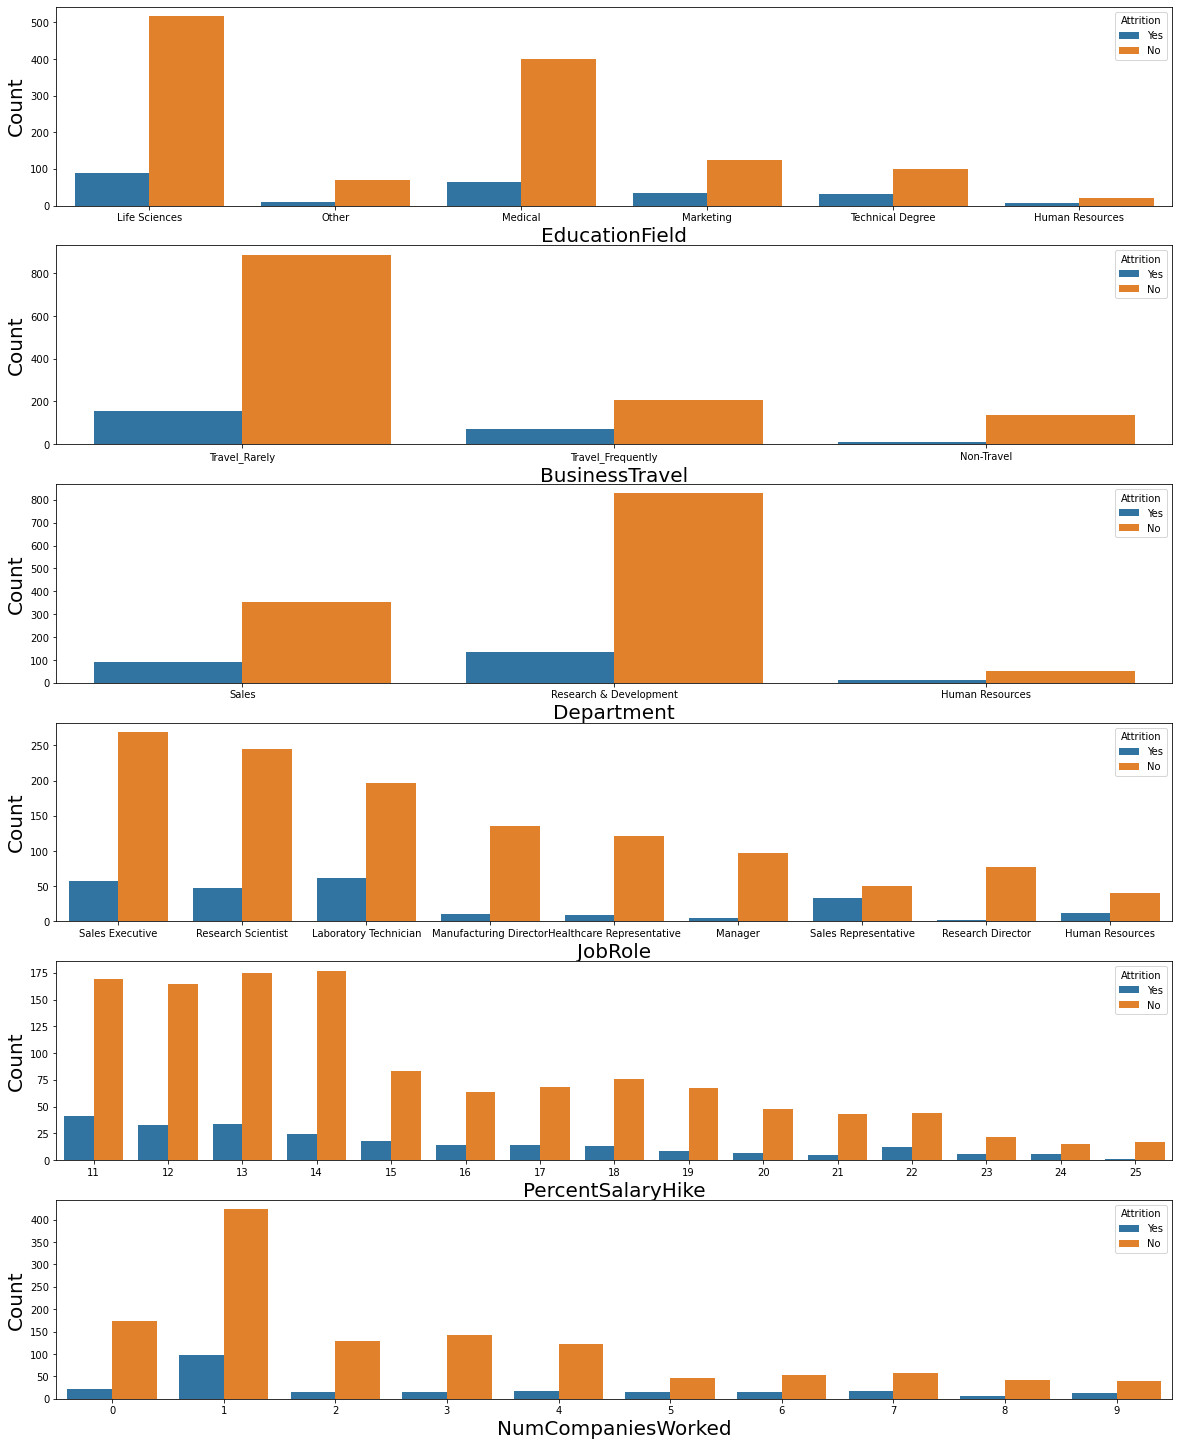

In [809]:
plt.figure(figsize=(20,30),facecolor='white')
plot_number2=1
x_plot2 = df[['EducationField','BusinessTravel','Department','JobRole','PercentSalaryHike','NumCompaniesWorked']]
y_plot2 = df['Attrition']
for i in x_plot2:
    if plot_number2<=len(x_plot2.columns):
        ax2=plt.subplot(7,1,plot_number2)
        sns.countplot(x_plot2[i], hue=y_plot2)
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plot_number2+=1
plt.show()

Below are the observation obtained by analyzing above comparision graph

1. EducationField - Employees with Educational Background of Life Science, Medical, Marketing has less attrition rate comparatively

2. BusinessTravel - Employees with less travel requirement (Travel rarely) has less attrition rate comparatively

3. Department - Employees working in R & D Department has less attrition rate comparatively

4. JobRole - Employees working in positions like Sale Executive, Research Scientist has less attrition rate comparatively which is followed by Laboratory Technician. With respect to count, these 3 Job position holding employees contribute more foor attrition. This is due to high number of employees working in these positions

5. PercentSalaryHike - Employees with lower salary hike contribute to attrition

6. NumCompaniesWorked - Employees with experience of working in 1 company has high attrition rate and followed freshers or employees with no other company woork experience 

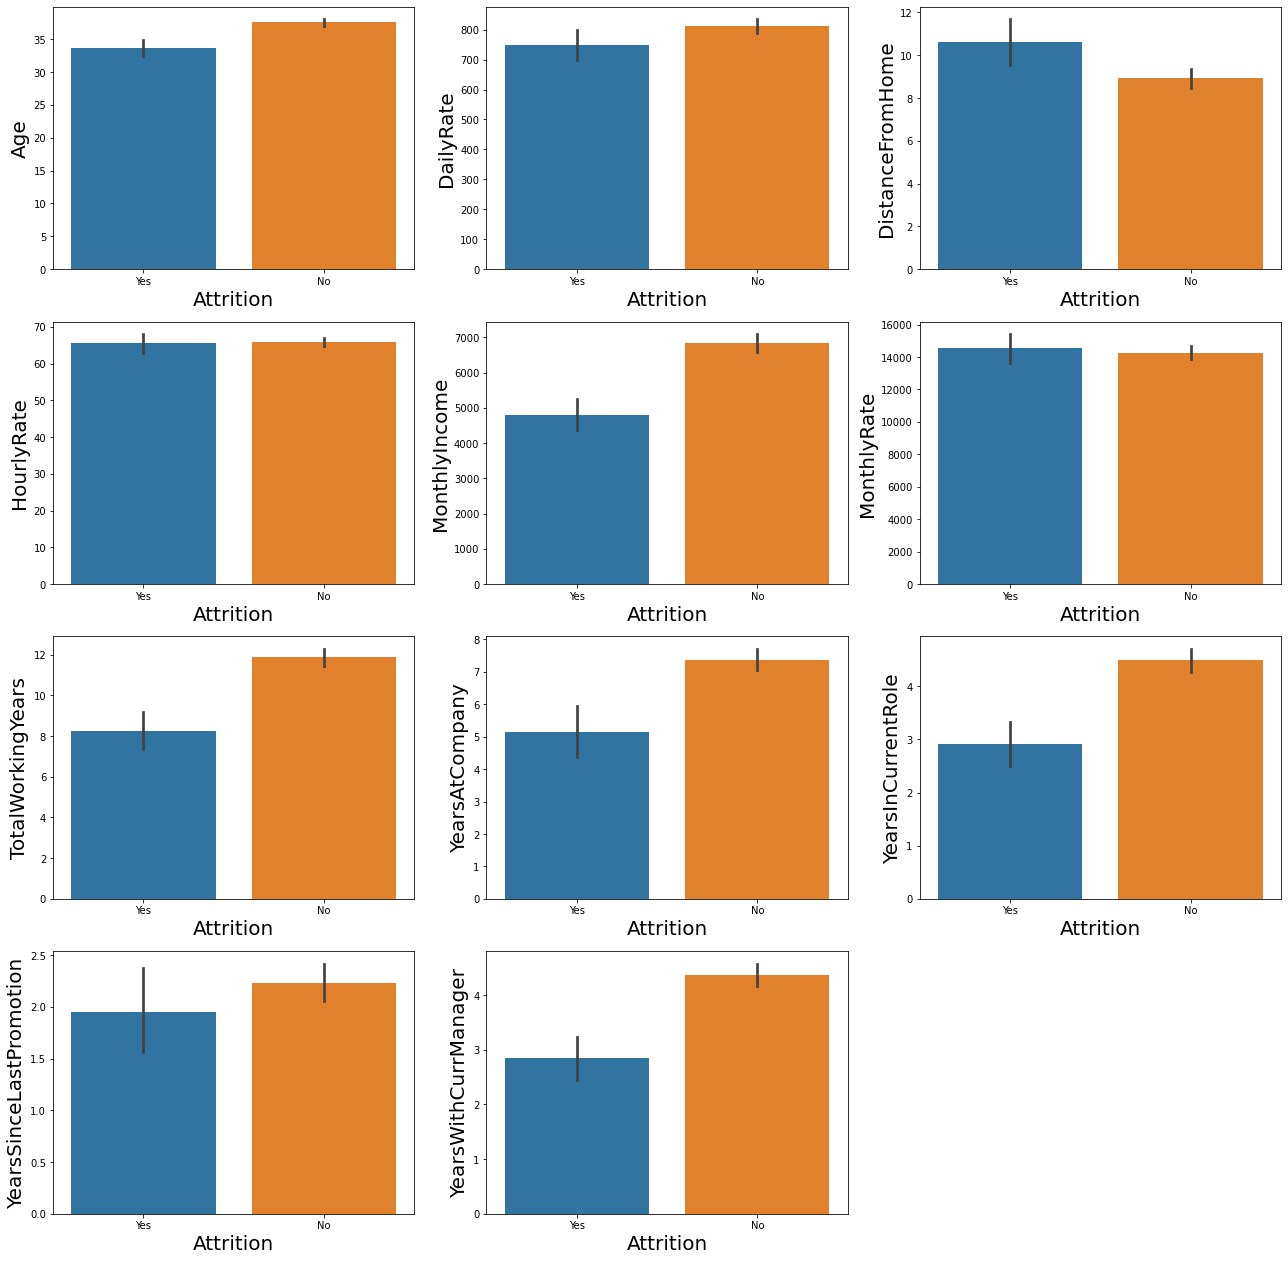

In [810]:
plt.figure(figsize=(22,28),facecolor='white')
plot_number=1
x_plot = df[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears',
             'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
y_plot = df['Attrition']
for i in x_plot:
    if plot_number<=len(x_plot.columns):
        ax=plt.subplot(5,3,plot_number)
        sns.barplot(y_plot,x_plot[i])
        plt.xlabel('Attrition',fontsize=20)
        plt.ylabel(i,fontsize=20)
    plot_number+=1
plt.show()

Below are the observation obtained by analyzing above comparision graph

1. YearsWithCurrManager - Attrition Rate is high with respect to employees who are working under same manager for longer time i.e. more than nearly 3 years

2. Age - Employees below than 35 Age have high attrition rate and above 35 Age has less rate. 

3. Daily Rate - Only slight difference is seen and attrition is high in case of lower daily rate employees

4. YearsSinceLastPromotion - Employees who have got no promotion for more than nearly 2 years have higher attrition rate however, employees with much more gap in promotion are not quitting the employment.

5. DistanceFromHome - Employees who travel more distance than around 9 (distance factor) have higher attrition rate

6. YearsAtCompany - Attrition rate is less in case of Employees who have crossed 5 years of experience in current company

7. HourlyRate - This column data doesnt affect the attrition rate much. These are neutral columns so we can drop this column if required later

8. MonthlyIncome - Attrition rate is visible in case of emmployees with less monthly income.

9. MonthlyRate - Similar to HourlyRate, even MonthlyRate doesn't doesnt affect the attrition rate much. Even this column is neutral and can drop this column if required later

10. TotalWorkingYears - Employees with longer Total work experience years above 8 years doesnt have much attrition rate.

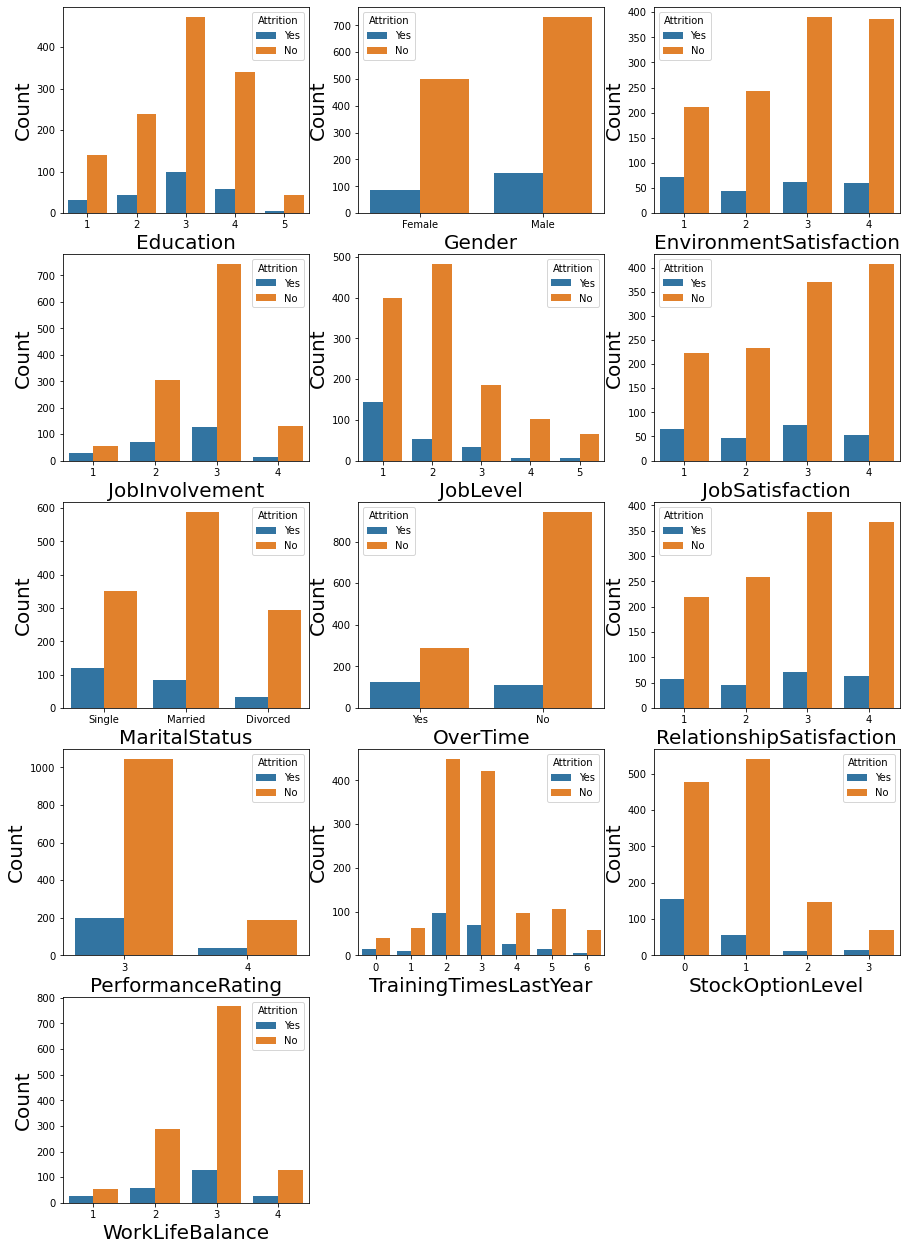

In [811]:
plt.figure(figsize=(15,22),facecolor='white')
plot_number1=1
x_plot1 = df[['Education','Gender','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MaritalStatus',
              'OverTime','RelationshipSatisfaction','PerformanceRating','TrainingTimesLastYear','StockOptionLevel',
              'WorkLifeBalance']]
y_plot1 = df['Attrition']
for i in x_plot1:
    if plot_number1<=len(x_plot1.columns):
        ax1=plt.subplot(5,3,plot_number1)
        sns.countplot(x_plot1[i], hue=y_plot1)
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plot_number1+=1
plt.show()

Below are the observation obtained by analyzing above comparision graph

1. Education - Employees who have 3, 4, 2 Education have less rate but countwise 3 education employees has high value due to huge number employees falling under this type

2. Gender - Male Employees have  higher attrition compared to Female employees. Countwise, Since Male employees are more, it is high

3. EnvironmentSatisfaction - Employees with Environment Satisfaction of 3 and 4 contribute less to attrition comparatively. Employees with Environment Satisfaction of 1 has high attrition rating.

4. JobInvolvement - Employees with Job Involvement of 3 contribute less to attrition comparatively however count wise it is high due to majority of employee falling under this.

5. JobLevel - Employees under Job Level 2 contribute less to attrition comparatively However 1 has more rate

6. JobSatisfaction - Employees with Highest Job Satisfaction of 4 and 3 contribute less to attrition comparatively

7. MaritalStatus - Single Status employee contribute more to attrition and married contribute less.

8. OverTime - Employees who doesnt work over time contribute less to attrition comparatively

9. RelationshipSatisfaction - Employees with Relationship Satisfaction of 3 and 4 contribute less to attrition comparatively

10. PerformanceRating - Employees with Performance Rating of 3 contribute less to attrition comparatively with those of rating 4.

11. TrainingTimesLastYear - Employees who have undergone 2 and 3 training in last year contribute less to attrition comparatively.

12. StockOptionLevel - Employees who have Stock Option Level 1 contribute less to attrition comparatively.

13. WorkLifeBalance - Employees with Work Life Balance rating of 3 contribute less to attrition comparatively.

In [812]:
df.drop(columns=['EmployeeCount','Over18','StandardHours','EmployeeNumber'],inplace=True)

Dropping the Columns which doesnt contribute much to target variable as discussed in earlier notes

In [813]:
df.shape

(1470, 31)

We can observe 4 columns is reduced. i.e. from 35 to 31

### Encoding the Categorical Data using Label Encoder

In [814]:
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['OverTime'] = le.fit_transform(df['OverTime'])

In [815]:
df.shape

(1470, 31)

Crosschecking whether same Data Shape is retained. Same Data shape is retained

In [816]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


Crosschecking whether categorical data is encoded or not. It can be confirmed that encoding is done correctly

In [817]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [818]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

Analyzing the changes in dataset after encoding. All values are integer now. Almost similar observation is reflecting like the earlier one

### Checking Correlation between each columns data

In [819]:
corr_mat=df.corr()
corr_mat

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


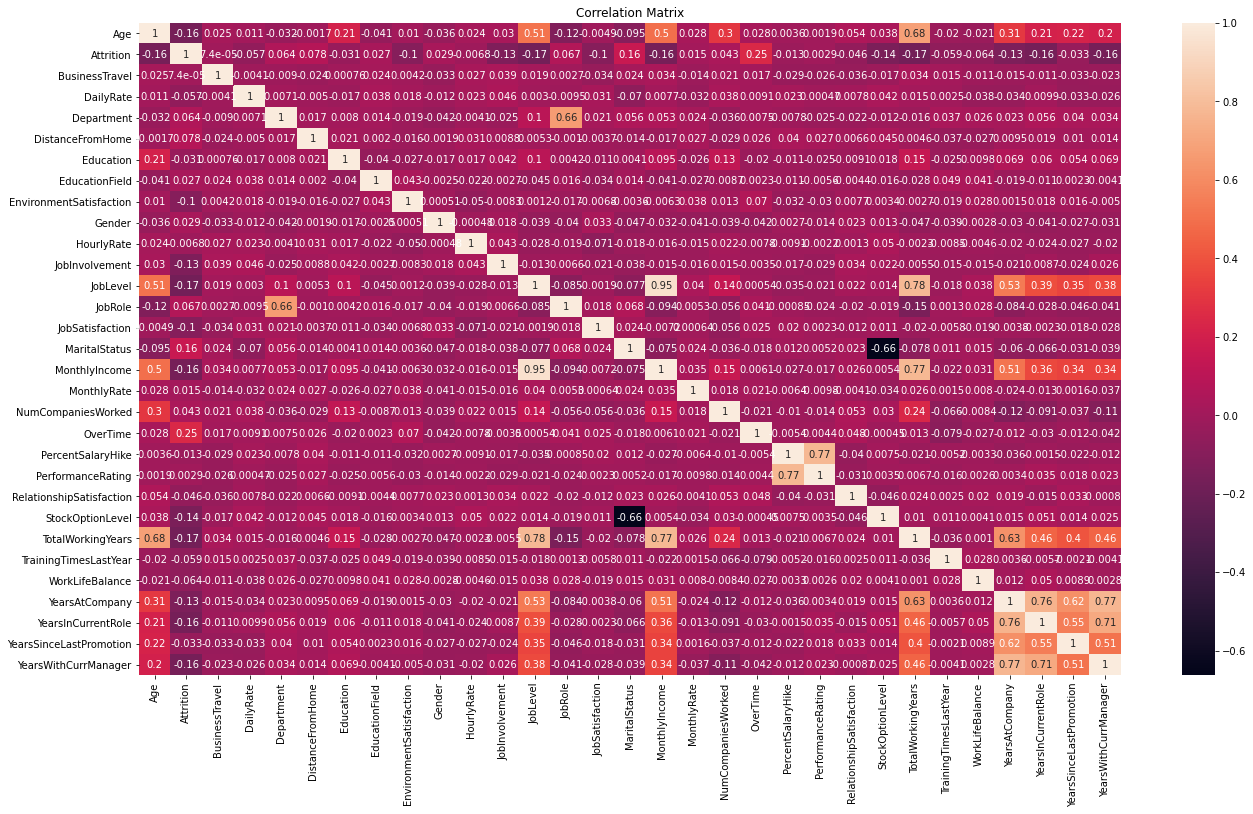

In [820]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

<AxesSubplot:>

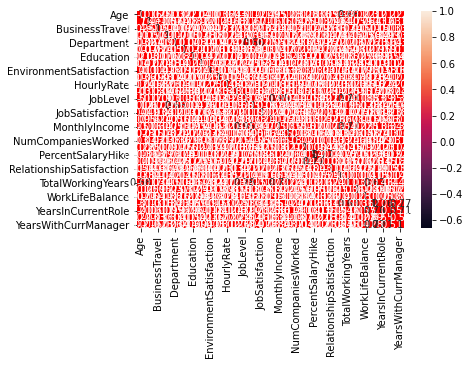

In [821]:
sns.heatmap(corr_mat,annot=True,linewidths=10,linecolor='r')

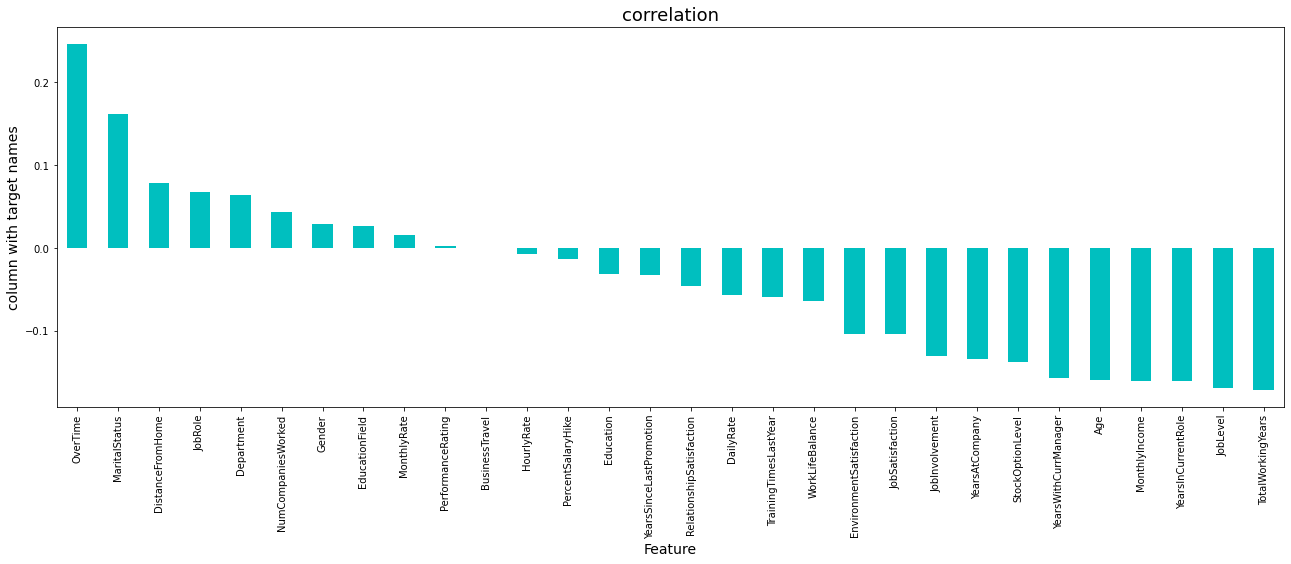

In [822]:
plt.figure(figsize=(22,7))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [823]:
corr_mat["Attrition"].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M

Using Heatmap, Correlation Matrix we can conclude that prediction done earlier is almost true.


1. OverTime, Marital Status, Distance from Home, Job Role, Department are positively correlated with Attrition Column data (in Positive Correlation Descending Order) reasonably


2. TotalWorkingYears, JobLevel, YearsInCurrentRole, MonthlyIncome, Age, YearsWithCurrManager are negatively correlated with Attrition Column data (in Negative Correlation Descending Order)


3. PerformanceRating, BusinessTravel, HourlyRate column data has very less correlation with Attrition Column Data. If the Model Accuracy is less, these columns can be dropped because of very less correlationship with Target Variable


### Checking for Outliers through boxplots and analyzing each column Outliers 

In [824]:
x = df.drop(columns=['Attrition'])
y = df['Attrition']
x_outlier=x.copy()
x_outlier

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,...,3,4,0,17,3,2,9,6,0,8


Separate target and feature columns/ data for Outliers

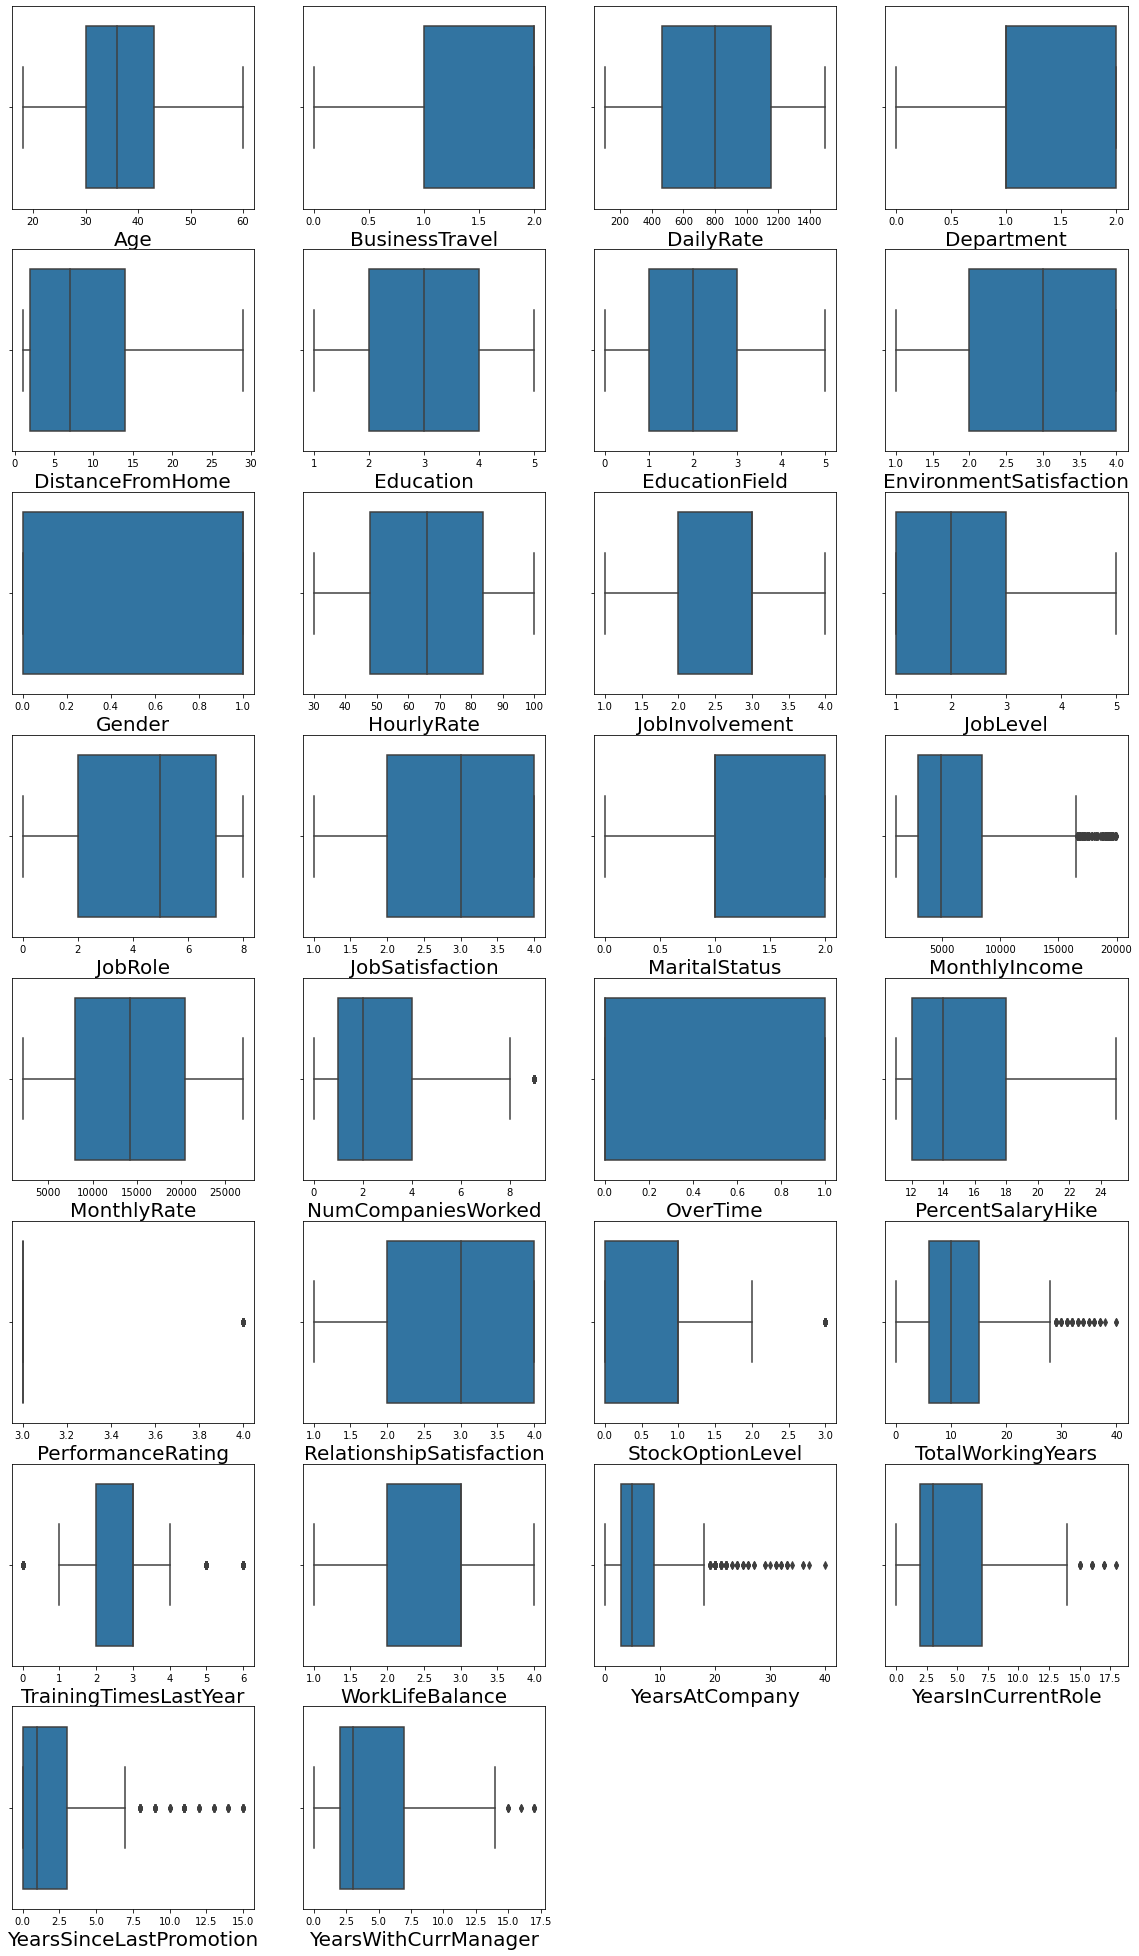

In [825]:
plt.figure(figsize=(20,35),facecolor='white')
plot_number3=1
for i in x_outlier:
    if plot_number3<=31:
        plt.subplot(8,4,plot_number3)
        sns.boxplot(x_outlier[i])
        plt.xlabel(i,fontsize=20)
    plot_number3+=1
plt.show()

From above plots, we can confirm that there are outliers in Monthly Income, NumCompaniesWorked, PerformanceRating, StockOptionLevel, TotalWokringYears, TrainingTimesLastYear, YearsAtCompany, YearInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager Column Data

### Outliers Removal

#### ZScore and IQR Method will be used to remove the Outliers and based on the data loss, Best method for this dataset will be chosen

#### 1. Using ZScore Method

Copying dataset without categorical data columns to new file

In [826]:
from scipy.stats import zscore
z=np.abs(zscore(x_outlier))
x_zscore=x_outlier[(z<3).all(axis=1)]

Applying zscore to remove the Outliers

##### Obtaining Data Set Shape after Outliers removed using zscore method

In [827]:
x_zscore.shape

(1387, 30)

##### Dataset Shape before Outliers removal

In [828]:
x_outlier.shape

(1470, 30)

In [829]:
zscore_data_loss=((1470-1387)/1470)*100
zscore_data_loss

5.646258503401361

Upon analyzing, found 5.64% of Data loss is occured when ZScore Method is used for Outliers removal for this Data set

#### 2. Using IQR Method

##### Applying IQR Method and Obtaining Data Set Shape after Outliers removed using IQR  method

In [830]:
import scipy.stats as stats
Q1 = x_outlier.quantile(q=.25)
Q3 = x_outlier.quantile(q=.75)
IQR = x_outlier.apply(stats.iqr)

x_iqr = x_outlier[~((x_outlier < (Q1-1.5*IQR)) | (x_outlier > (Q3+1.5*IQR))).any(axis=1)]
x_iqr.shape

(779, 30)

In [831]:
iqr_data_loss=((1470-779)/1470)*100
iqr_data_loss

47.006802721088434

Upon analyzing, found 47.000% of Data loss is occured when IQR Method is used for Outliers removal for this Data set which is huge data loss so, proceeding with Zscore Method

#### Analyzing Outliers through Boxplots after using Zscore

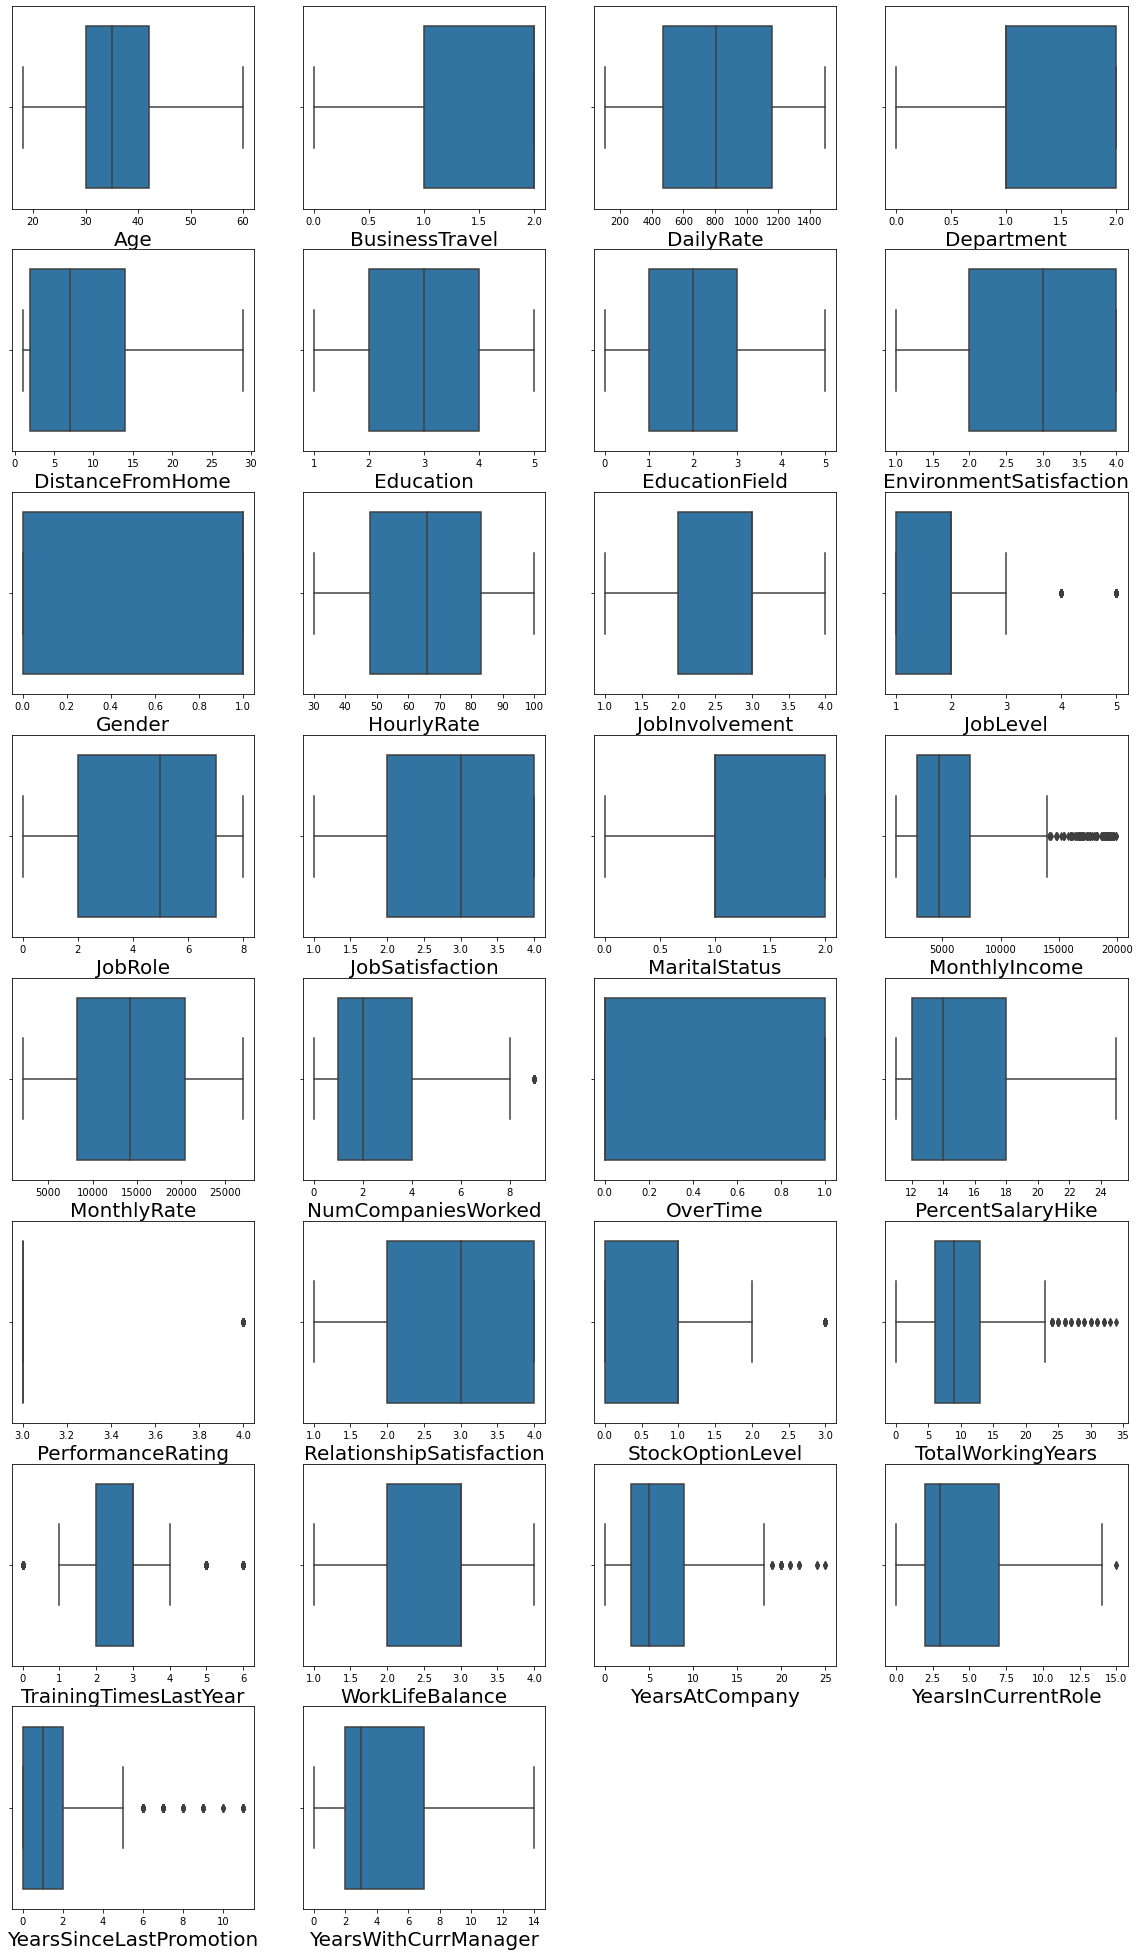

In [832]:
plt.figure(figsize=(20,35),facecolor='white')
plot_number3=1
for i in x_zscore:
    if plot_number3<=31:
        plt.subplot(8,4,plot_number3)
        sns.boxplot(x_zscore[i])
        plt.xlabel(i,fontsize=20)
    plot_number3+=1
plt.show()

Upon reviewing above boxplots, we can observe significant amount of outliers is removed.

### Merging the Outlier Removed Feature Data Set with Earlier Original Data Set

In [833]:
drop_index = df.index.difference(x_zscore.index)
df.drop(drop_index,inplace = True)
df.reset_index(drop=True,inplace = True)
df.shape

(1387, 31)

We can observe that Target variable is merged with outlier removed feature data set

### Skewness Analysis and Skewness Correction

#### 1. Using CBRT Technique

In [834]:
df_cbrt = df.copy()
df_cbrt

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1383,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1384,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1385,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


Copying the dataset to new name for CBRT Technique

In [835]:
x = df_cbrt.drop(columns=['Attrition'])
y = df_cbrt['Attrition']
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

In [836]:
x.skew()

Age                         0.472280
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
Y

Upon review, found below columns has skewness out of range -0.5 to +0.5

BusinessTravel,
DistanceFromHome,
JobLevel,
MonthlyIncome,
NumCompaniesWorked,
OverTime,
PercentSalaryHike,
PerformaceRating,
StockOptionLevel,
TotalWorkingYears,
TrainingTimesLastYear,
WorkLifeBalance,
YearsAtCompany,
YearsInCurrentRole,
YearsSinceLastPromotion,
YearsWithCurrManager 

In [837]:
x.skew()
print(len(x.skew().loc[x.skew()>0.55]))
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt( x[index])

14


In [838]:
x.skew()

Age                         0.472280
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.183373
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.508238
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.742985
MonthlyRate                 0.030596
NumCompaniesWorked         -0.689329
OverTime                    0.954751
PercentSalaryHike           0.582921
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel           -0.131820
TotalWorkingYears          -0.563399
TrainingTimesLastYear      -2.488197
WorkLifeBalance            -0.557100
YearsAtCompany             -0.700051
Y

Upon reviewing above set after skewness correction from CBRT Technique, found below observations,


1. DistanceFromHome, JobLevel, StockOptionLevel, YearsSinceLastPromotion Skewness are reduced and within -0.55 to +0.55 range


2. MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager Skewness is reduced but it is still outside the range of -0.55 to +0.55


3. TrainingTimesLastYear Skewness is increased.


4. BusinessTravel, OverTime, PerformanceRating is unchanged

#### 2. Using Power Transformer Technique

In [839]:
df_powertransform = df.copy()
df_powertransform

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1383,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1384,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1385,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [840]:
x1 = df_powertransform.drop(columns=['Attrition'])
y1 = df_powertransform['Attrition']
y1.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

In [841]:
x1.skew()

Age                         0.472280
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
Y

Copying the dataset to new name for Power Transform Technique

In [842]:
x1_skew = power_transform(x1)
x1_skew = pd.DataFrame(x1_skew, columns=x1.columns)
x1_skew.skew()

Age                        -0.004079
BusinessTravel             -0.960583
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField             -0.008642
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
Y

PerformanceRating Skewness is showing as 0. However, PerformanceRating will be dropped in coming steps since it has very less correlation; So proceeding with Power Transform Technique

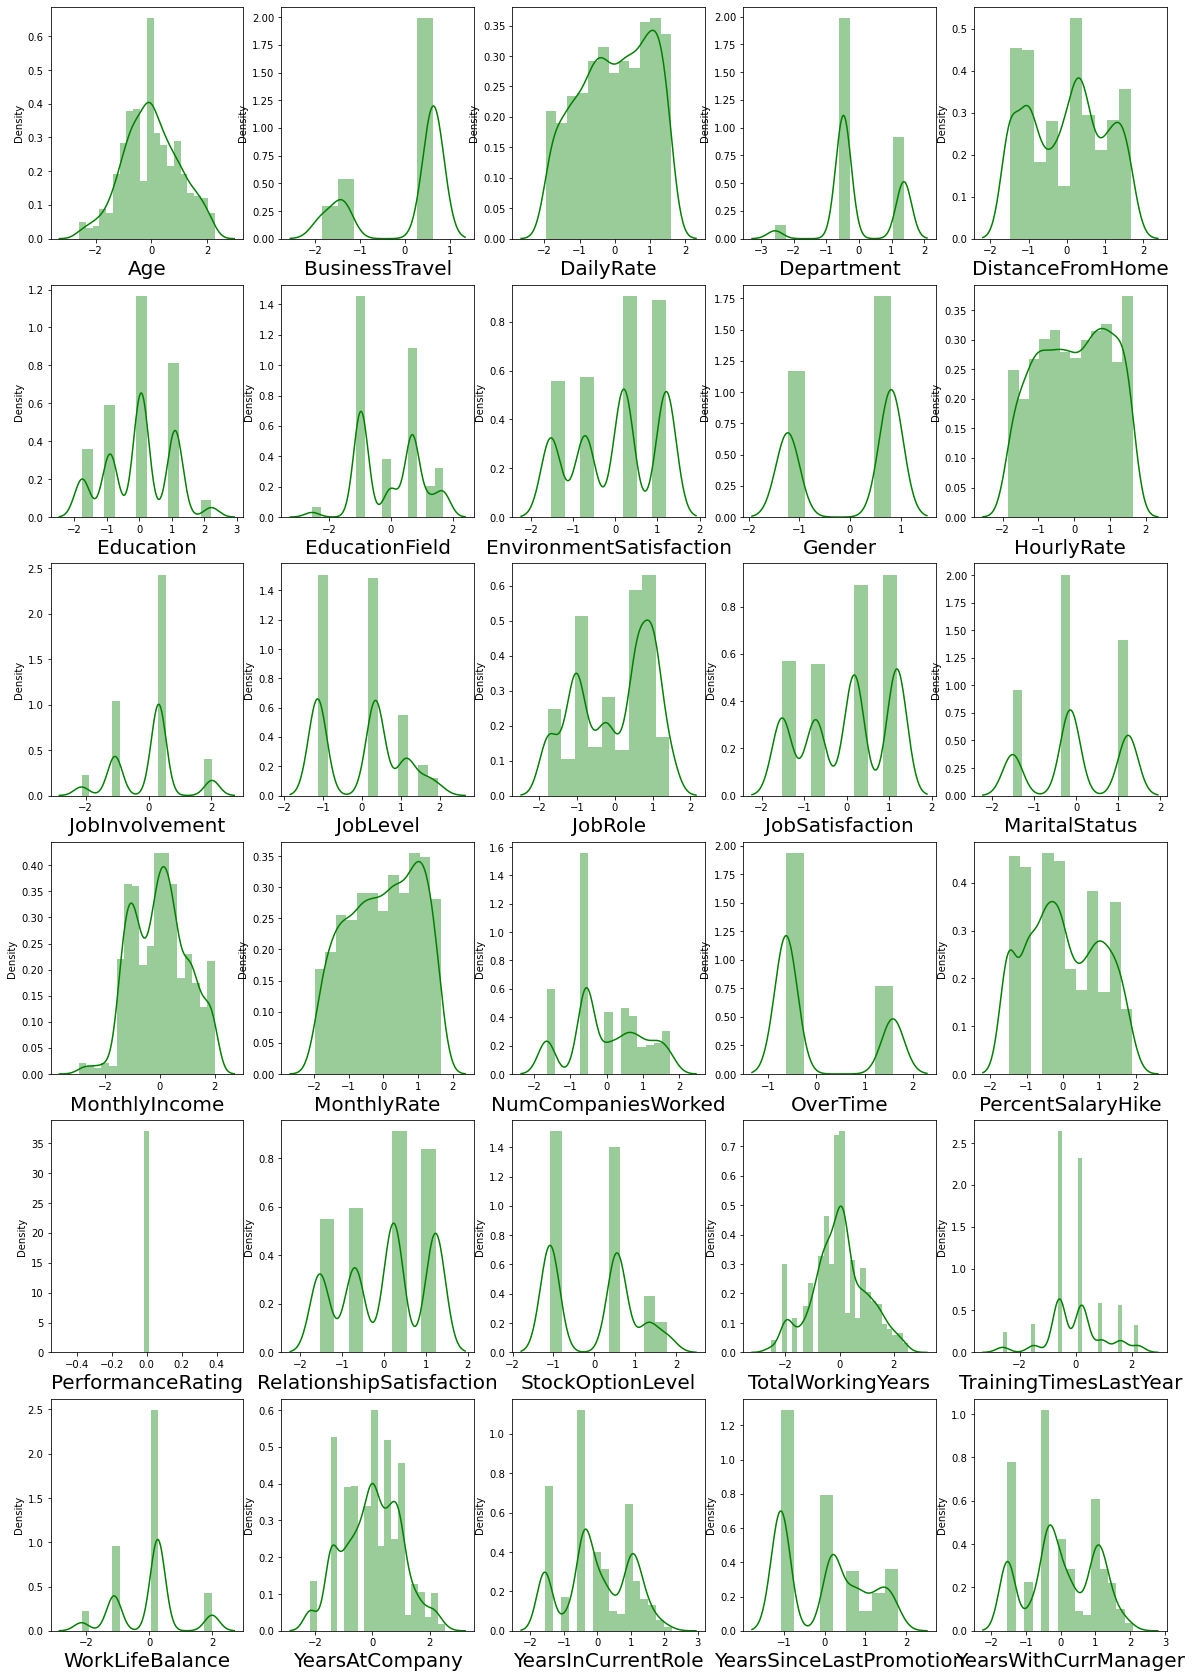

In [843]:
plt.figure(figsize = (20,35))
plot_number = 1
for i in x1_skew:
    if plot_number <=31:
        plt.subplot(7,5,plot_number)
        sns.distplot(x1_skew[i], color = 'green')
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()

From these distribution plots, We can observe significant skewness is corrected and most of the columns data are normally distributed

### Feature and Target Selection

In [844]:
x = x1.copy()
y = y1.copy()
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

### Applying Standard Scaler in order to check the Multicollinearity

In [845]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 0.5366811 ,  0.59312579,  0.73432467, ...,  0.04090327,
        -0.71069889,  0.36826963],
       [ 1.44211114, -0.90535412, -1.30776866, ...,  0.96589518,
        -0.31047991,  0.9821999 ],
       [ 0.08396607,  0.59312579,  1.40675151, ..., -1.19241928,
        -0.71069889, -1.16655603],
       ...,
       [-1.04782149,  0.59312579, -1.61544736, ..., -0.575758  ,
        -0.71069889, -0.24566063],
       [ 1.44211114, -0.90535412,  0.53830356, ...,  0.65756454,
        -0.71069889,  1.28916503],
       [-0.2555702 ,  0.59312579, -0.44180199, ..., -0.26742737,
        -0.31047991, -0.55262577]])

### Obtaining Multicollinearity using Variance Inflation Factor

In [846]:
vif = pd.DataFrame()

In [847]:
vif["Columns"] = x.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,Columns,vif
0,Age,1.850568
1,BusinessTravel,1.014106
2,DailyRate,1.029494
3,Department,2.062034
4,DistanceFromHome,1.019457
5,Education,1.061558
6,EducationField,1.021559
7,EnvironmentSatisfaction,1.021370
8,Gender,1.023993
9,HourlyRate,1.022001


From above set, we can observe that JobLevel, MonthlyIncome has the high multicollinearity comparatively. So, After analysing the Principal components, we shall decide on whether to drop these columns with high multicollinearity. Since these 2 columns has high correlation comparatively

### Principle Component Analysis 

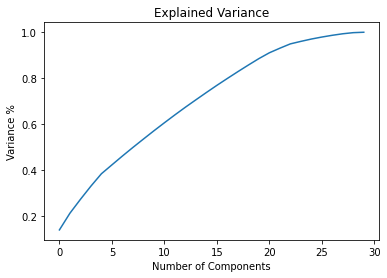

In [848]:
pca = PCA()
principle_components = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

We can conclude that for 95% variance, nearly 25 Principle components are contributing. So we can retain 25 components out of 31 components and build the model

In [849]:
pca_new = PCA(n_components=25)
new_components = pca_new.fit_transform(x_scaled)
x_principle=pd.DataFrame(new_components,columns=np.arange(25))
x_principle

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.066081,0.708412,-1.992210,-1.367073,0.406752,-2.511483,1.275956,1.039991,0.893589,2.544398,...,-0.775729,-0.325432,1.417971,-0.381036,1.352432,1.500992,-0.657347,-0.722968,0.239073,-0.468063
1,0.942167,-1.010162,2.764974,-1.456442,0.123907,0.688679,0.098571,-1.140013,1.065517,-1.490969,...,-1.850596,-0.086873,0.203254,-0.073841,0.411536,0.438970,-1.496196,1.416007,0.123105,0.552064
2,-2.519634,1.398823,-0.174765,-0.150804,-1.399552,0.850434,1.146782,1.524415,-1.917912,0.524861,...,0.627056,-1.690928,-0.103380,0.188184,-0.307512,1.515120,-0.038420,-0.107847,0.270029,-0.405432
3,-0.554723,-0.822108,-1.123124,0.386996,-0.446998,-0.383536,1.656396,0.582805,0.247953,-0.696461,...,0.183922,-0.170715,0.152350,-0.636285,-1.310962,-0.153811,0.402807,0.320315,-0.903161,0.308540
4,-1.793002,0.841406,-0.314986,1.151445,-1.024098,0.889495,-0.665588,-0.492197,-0.756643,-0.382076,...,-1.122356,1.566479,1.161823,-1.350738,1.425667,2.050888,0.381466,-1.095734,0.184816,-0.462704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,-0.412007,0.795160,0.752409,0.757847,-0.375060,-0.284572,0.739872,-0.710387,-0.888488,-0.322334,...,1.017467,1.087774,-0.194787,0.934552,0.719532,0.799458,-0.636464,-0.000744,0.170032,-0.178578
1383,1.362645,0.157035,0.346129,0.873193,-1.256513,3.512363,-0.023195,-0.612593,0.870010,0.385700,...,-1.156807,0.390488,-0.128480,0.522768,-0.855561,1.182288,-0.792703,-0.558115,0.362896,-0.851786
1384,-1.075138,-0.068985,2.474522,-0.777289,0.324561,-1.968597,-0.349613,0.941956,0.002960,-0.111446,...,0.708183,0.665926,1.185269,1.133915,-0.687864,-0.513843,0.253403,-0.808497,0.091158,0.049816
1385,1.379948,-0.435923,-1.187339,-0.586728,0.409641,0.122102,0.315472,0.086767,-1.195968,-0.768318,...,-2.220025,-0.354181,-0.304872,0.221616,-0.181680,-0.552257,-1.804269,1.085074,-0.546706,-0.315805


### Selecting KBest Features

#### Through KBest Features Technique, Features with least score can be obtained which will help us in deciding which columns to drop before proceeding to Model Building

In [850]:
best_features = SelectKBest(score_func = f_classif, k = 30)
best_fit = best_features.fit(x,y)
scores = pd.DataFrame(best_fit.scores_)
columns = pd.DataFrame(x.columns)

In [851]:
best_fit = best_features.fit(x,y)
scores = pd.DataFrame(best_fit.scores_)
columns = pd.DataFrame(x.columns)
columns.head()
featureScores = pd.concat([columns,scores],axis = 1)
featureScores.columns = ['Features', 'Scores']
print(featureScores.nlargest(30,'Scores'))

                    Features     Scores
18                  OverTime  98.140453
23         TotalWorkingYears  49.422063
11                  JobLevel  42.206842
27        YearsInCurrentRole  41.726267
26            YearsAtCompany  39.467993
29      YearsWithCurrManager  37.468266
15             MonthlyIncome  37.255699
14             MaritalStatus  36.836958
0                        Age  36.092149
22          StockOptionLevel  26.364601
10            JobInvolvement  25.307350
13           JobSatisfaction  18.303387
7    EnvironmentSatisfaction  17.719366
4           DistanceFromHome   9.327110
12                   JobRole   5.747073
3                 Department   5.631654
25           WorkLifeBalance   5.429960
24     TrainingTimesLastYear   4.559904
2                  DailyRate   4.549637
21  RelationshipSatisfaction   3.805168
17        NumCompaniesWorked   3.514981
8                     Gender   1.822547
5                  Education   1.482792
28   YearsSinceLastPromotion   1.187027


1. Upon reviewing Best Features Scores, found BusinessTravel, HourlyRate has least score, so dropping this column would be best solution. Also PerformanceRating has low score and low correlation as discussed earlier and also, YearsSinceLastPromotion has low score and considerably high outliers so dropping these columns.


2. Upon reviewing Multicollinearity using Variance Inflation Factor, MonthlyIncome has highest Multicollinearity and also Outliers is high for this. So this will be dropped

In [852]:
x_best = x.drop(columns = ['MonthlyIncome','BusinessTravel', 'HourlyRate', 'YearsSinceLastPromotion', 'PerformanceRating']).copy() 

In [853]:
x_best

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1102,2,1,2,1,2,0,3,2,...,1,11,1,0,8,0,1,6,4,5
1,49,279,1,8,1,1,3,1,2,2,...,0,23,4,1,10,3,3,10,7,7
2,37,1373,1,2,2,4,4,1,2,1,...,1,15,2,0,7,3,3,0,0,0
3,33,1392,1,3,4,1,4,0,3,1,...,1,11,3,0,8,3,3,8,7,0
4,27,591,1,2,1,3,1,1,3,1,...,0,12,4,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,36,884,1,23,2,3,3,1,4,2,...,0,17,3,1,17,3,3,5,2,3
1383,39,613,1,6,1,3,4,1,2,3,...,0,15,1,1,9,5,3,7,7,7
1384,27,155,1,4,3,1,2,1,4,2,...,1,20,2,1,6,0,3,6,2,3
1385,49,1023,2,2,3,3,4,1,2,2,...,0,14,4,0,17,3,2,9,6,8


### Resolving Class Imbalance using Oversampling (SMOTE Technique)

In [854]:
from imblearn.over_sampling import SMOTE
Sm = SMOTE()
x_over, y_over = Sm.fit_resample(x_best,y)

In [855]:
y_over.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

Class is Balanced now.

In [856]:
x = sc.fit_transform(x_over)
y = y_over.copy()

Applying Standard Scaler since data variation is high and thus scaling will help in better accuracy

## Model Building: Classification Problem

### Finding the Best Random State 

In [857]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = i)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8593314763231198 on random_state: 75


In [858]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = maxRS)

In [859]:
#Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
accuracy_rfc = classification_report(y_test,rfc_pred)
confusion_matrix_rfc = confusion_matrix(y_test,rfc_pred)
cvs_rfc=cvs(rfc,x,y,cv=5).mean()
roc_rfc=roc_auc_score(y_test,rfc_pred)

#Logistic Regression Model

lrc= LogisticRegression(solver='liblinear')
lrc.fit(x_train,y_train)
lrc_pred = lrc.predict(x_test)
accuracy_lrc = classification_report(y_test,lrc_pred)
confusion_matrix_lrc = confusion_matrix(y_test,lrc_pred)
cvs_lrc=cvs(lrc,x,y,cv=5).mean()
roc_lrc=roc_auc_score(y_test,lrc_pred)

#Decision Tree Classifier Model

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
accuracy_dtc = classification_report(y_test,dtc_pred)
confusion_matrix_dtc = confusion_matrix(y_test,dtc_pred)
cvs_dtc=cvs(dtc,x,y,cv=5).mean()
roc_dtc=roc_auc_score(y_test,dtc_pred)

#SVC Model

sv= SVC()
sv.fit(x_train,y_train)
sv_pred = sv.predict(x_test)
accuracy_sv = classification_report(y_test,sv_pred)
confusion_matrix_sv = confusion_matrix(y_test,sv_pred)
cvs_sv=cvs(sv,x,y,cv=5).mean()
roc_sv=roc_auc_score(y_test,sv_pred)

#K Nearest Neighbors Classifier Model

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
accuracy_knn = classification_report(y_test,knn_pred)
confusion_matrix_knn = confusion_matrix(y_test,knn_pred)
cvs_knn=cvs(knn,x,y,cv=5).mean()
roc_knn=roc_auc_score(y_test,knn_pred)

### Random Forest Classifier 

In [860]:
confusion_matrix_rfc

array([[338,  21],
       [ 51, 308]], dtype=int64)

In [861]:
print(accuracy_rfc)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       359
           1       0.94      0.86      0.90       359

    accuracy                           0.90       718
   macro avg       0.90      0.90      0.90       718
weighted avg       0.90      0.90      0.90       718



In [862]:
print(cvs_rfc)

0.8938482162806286


In [863]:
print(roc_rfc)

0.8997214484679665


rfc_difference = 90-89.38 = 0.62

### Logistic Regression Model

In [864]:
confusion_matrix_lrc

array([[303,  56],
       [ 46, 313]], dtype=int64)

In [865]:
print(accuracy_lrc)

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       359
           1       0.85      0.87      0.86       359

    accuracy                           0.86       718
   macro avg       0.86      0.86      0.86       718
weighted avg       0.86      0.86      0.86       718



In [866]:
print(cvs_lrc)

0.8178455723542116


In [867]:
print(roc_lrc)

0.8579387186629527


lrc_difference = 86-81.78 = 4.22

### Decision Tree Classifier Model

In [868]:
confusion_matrix_dtc

array([[276,  83],
       [ 68, 291]], dtype=int64)

In [869]:
print(accuracy_dtc)

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       359
           1       0.78      0.81      0.79       359

    accuracy                           0.79       718
   macro avg       0.79      0.79      0.79       718
weighted avg       0.79      0.79      0.79       718



In [870]:
print(cvs_dtc)

0.7992812988754003


In [871]:
print(roc_dtc)

0.7896935933147631


dtc_difference = 79-79.92 = -0.92

### SVC Model

In [872]:
confusion_matrix_sv

array([[330,  29],
       [ 43, 316]], dtype=int64)

In [873]:
print(accuracy_sv)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       359
           1       0.92      0.88      0.90       359

    accuracy                           0.90       718
   macro avg       0.90      0.90      0.90       718
weighted avg       0.90      0.90      0.90       718



In [874]:
print(cvs_sv)

0.8658067699411631


In [875]:
print(roc_sv)

0.8997214484679665


sv_difference = 90-86.58 = 3.42

### K Nearest Neighbors Classifier Model

In [876]:
confusion_matrix_knn

array([[268,  91],
       [ 16, 343]], dtype=int64)

In [877]:
print(accuracy_knn)

              precision    recall  f1-score   support

           0       0.94      0.75      0.83       359
           1       0.79      0.96      0.87       359

    accuracy                           0.85       718
   macro avg       0.87      0.85      0.85       718
weighted avg       0.87      0.85      0.85       718



In [878]:
print(cvs_knn)

0.8445706412452522


In [879]:
print(roc_knn)

0.850974930362117


knn_difference = 85-84.45 = 0.55

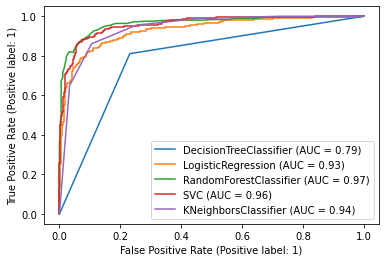

In [885]:
disp = plot_roc_curve(dtc,x_test,y_test)
mod = [lrc,rfc,sv,knn]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

Upon reviewing the difference between Accuracy and cross validation score, K Nearest Neighbors Classifier Model ranks with least difference and followed by Random Forest Classifier. However, when ROC is analyzed based on the above graph, Random Forest Classifier has best AUC so choosing Random Forest Classifier as Best Model

### Hyper Parameter Tuning Using Grid Search 

#### Defining the Parameters list for Random Forest Classifier

In [897]:
parameters = {'ccp_alpha': np.array([5,0.5,0.05,0.005,0.0005,1,0.1,0.01,0.001,0.0001,0]),
             'bootstrap': [True,False],
             'criterion': ["gini","entropy"],
             'max_depth': [300,200,150],
             'max_features': ["auto","sqrt","log2"]}

In [898]:
GridCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,n_jobs = -1,verbose=2)

In [899]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 396 candidates, totalling 1980 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'ccp_alpha': array([5.e+00, 5.e-01, 5.e-02, 5.e-03, 5.e-04, 1.e+00, 1.e-01, 1.e-02,
       1.e-03, 1.e-04, 0.e+00]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [300, 200, 150],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=2)

In [900]:
GridCV.best_params_

{'bootstrap': False,
 'ccp_alpha': 0.001,
 'criterion': 'entropy',
 'max_depth': 300,
 'max_features': 'log2'}

Obtaining Best Parameters details for Best Model after training the parameters list given

### Training the Best Model with the Best Model Parameters

In [901]:
Best_model = RandomForestClassifier(ccp_alpha = 0.001, bootstrap = False, criterion = 'entropy', max_depth = 300, max_features = 'log2')
Best_model.fit(x_train,y_train)
pred_rfc_bm = Best_model.predict(x_test)
accuracy_rfc_bm = accuracy_score(y_test,pred_rfc_bm)
print(accuracy_rfc_bm*100)

90.11142061281338


In [902]:
confusion_matrix = confusion_matrix(y_test,pred_rfc_bm)
confusion_matrix

array([[334,  25],
       [ 46, 313]], dtype=int64)

### Saving the Best Model

In [903]:
joblib.dump(Best_model,"HR_Analytics_Final_Best_Model_Random_Forest_Classifier.pkl")

['HR_Analytics_Final_Best_Model_Random_Forest_Classifier.pkl']

### Loading the Best Model

In [904]:
joblib.dump(Best_model,"HR_Analytics_Final_Best_Model_Random_Forest_Classifier.pkl")

['HR_Analytics_Final_Best_Model_Random_Forest_Classifier.pkl']

### Comparing Actual Value and Predicted Value

In [905]:
actual_data = np.array(y_test)
predicted_data = np.array(Best_model.predict(x_test))
df_comparision = pd.DataFrame({"Actual Value":actual_data, "Predicted Value":predicted_data}, index=range(len(actual_data)))
df_comparision

,Actual Value,Predicted Value
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
713,0,0
714,0,0
715,0,0
716,0,0


Upon review, found Predicted Value is 90.11% equivalent to Actual Values